##  Load Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action='ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## ## Load the Dataset

In [2]:
data=pd.read_csv('breast-cancer.csv')
df=pd.DataFrame(data)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
data.shape

(569, 32)

In [4]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop('id',axis=1,inplace=True)

<Axes: >

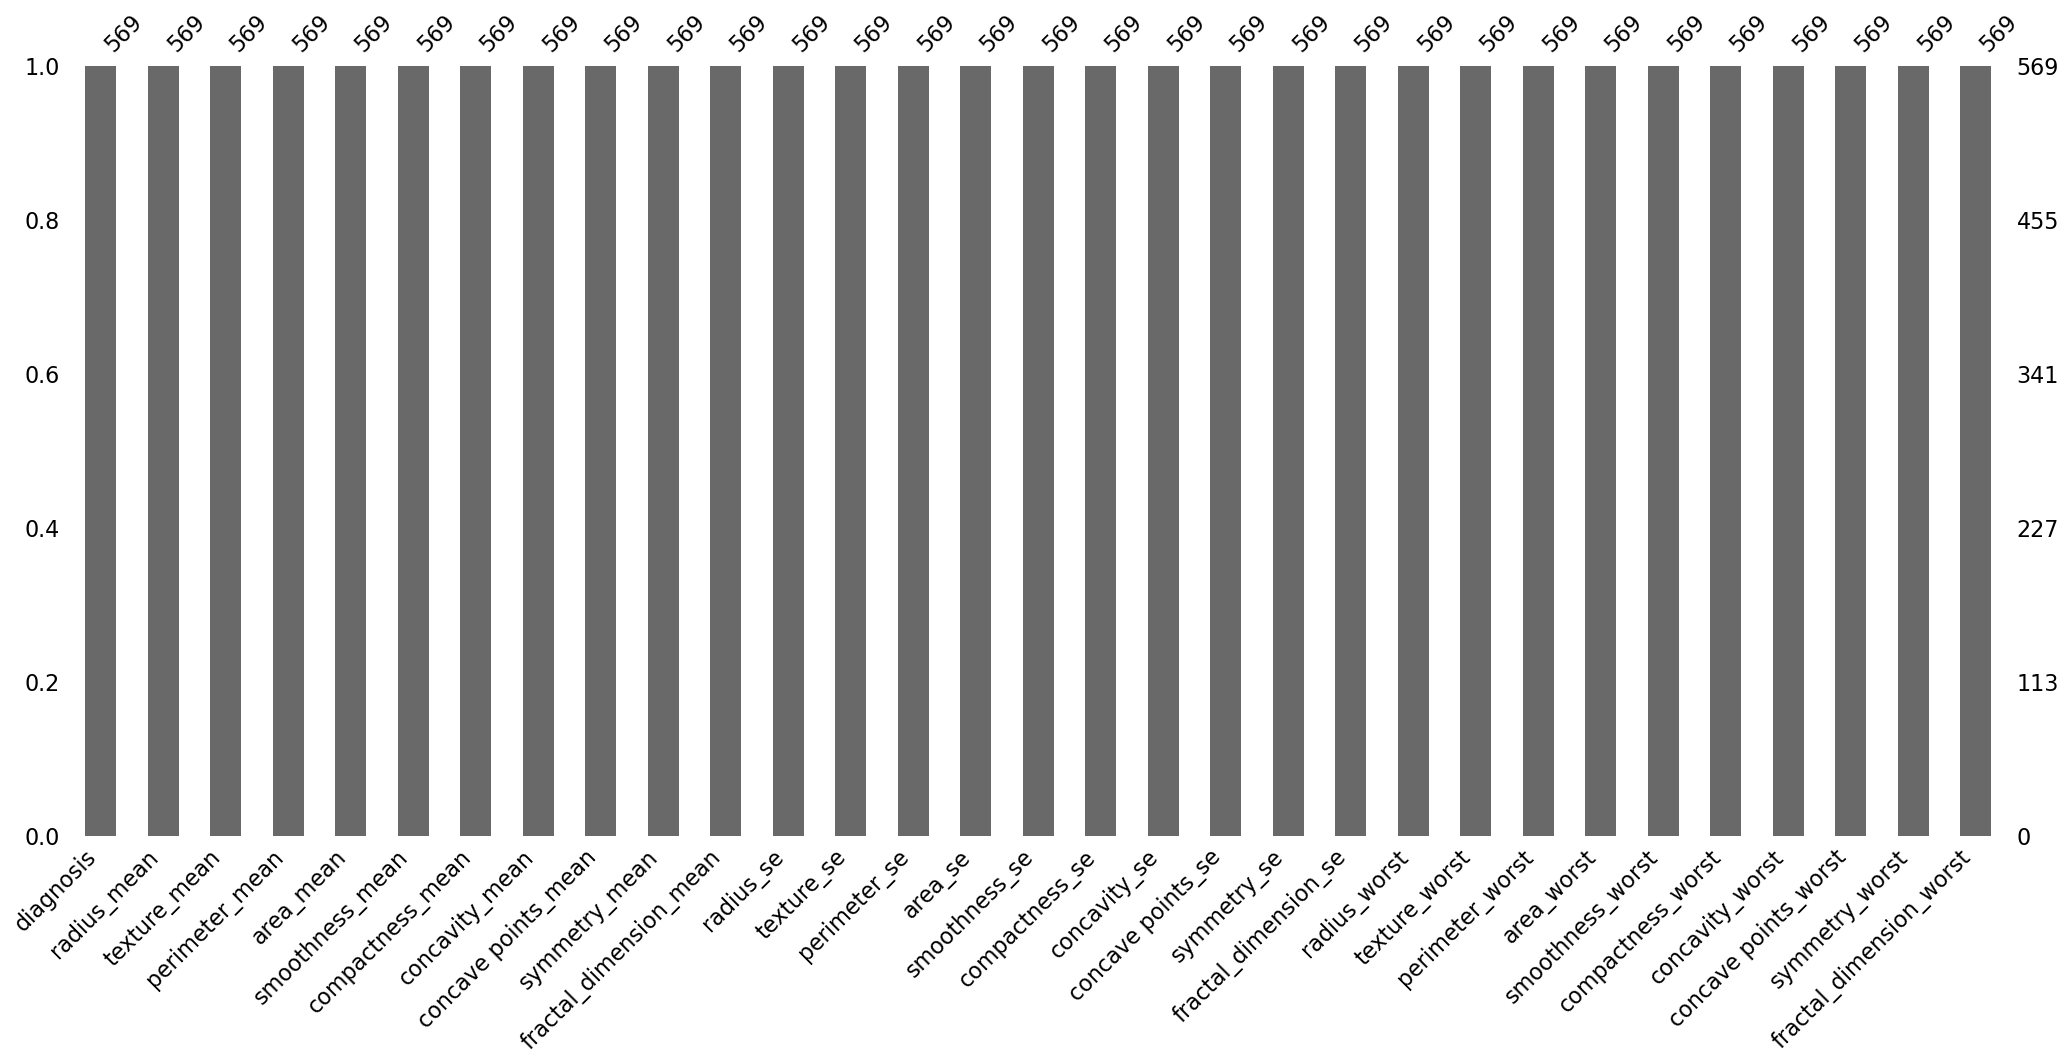

In [7]:
msno.bar(df)

In [8]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

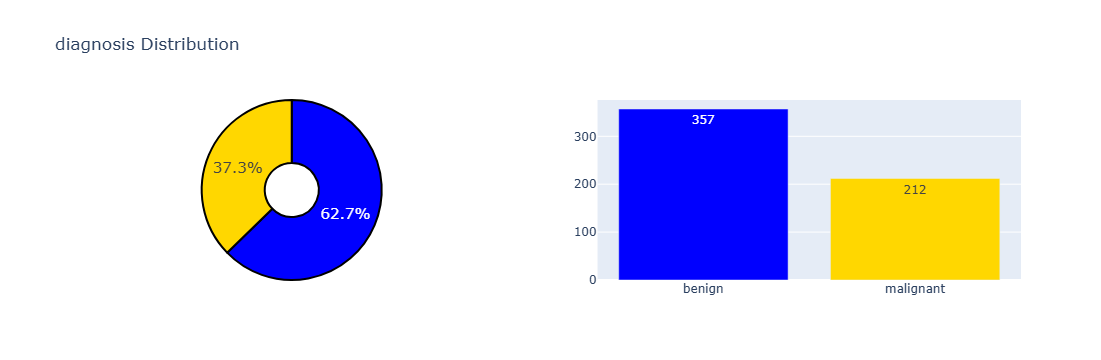

In [9]:
colors = ['blue', 'gold']
labels = ['benign','malignant']
values = df['diagnosis'].value_counts() / df['diagnosis'].shape[0]
counts = df['diagnosis'].value_counts().values      

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "xy"}]])

fig.add_trace(go.Pie(labels=labels, values=values, hole=.3,
                     hoverinfo='label+percent', textinfo='percent', textfont_size=15,
                     marker=dict(colors=colors, line=dict(color='#000000', width=2))),
              row=1, col=1)

fig.add_trace(go.Bar(x=labels, y=counts,
                     text=counts, textposition='auto',      
                     marker=dict(color=colors)),
              row=1, col=2)

fig.update_layout(title_text="diagnosis Distribution", showlegend=False)
fig.show()

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

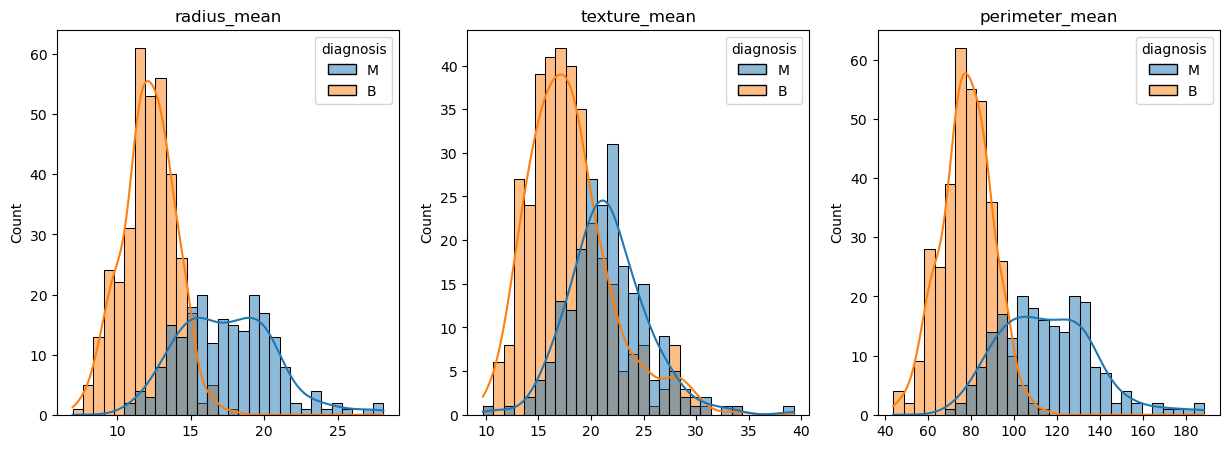

In [11]:
cols=['radius_mean','texture_mean','perimeter_mean']
plt.figure(figsize=(15,5))
for i,col in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.histplot(x=df[col],hue=df['diagnosis'],bins=30,kde=True)
    plt.title(col)
    plt.xlabel(" ")
plt.show()

## From this graph you can see that radius mean,texture_mean,perimeter_mean of malignant tumors are bigger than  bening tumors mostly.

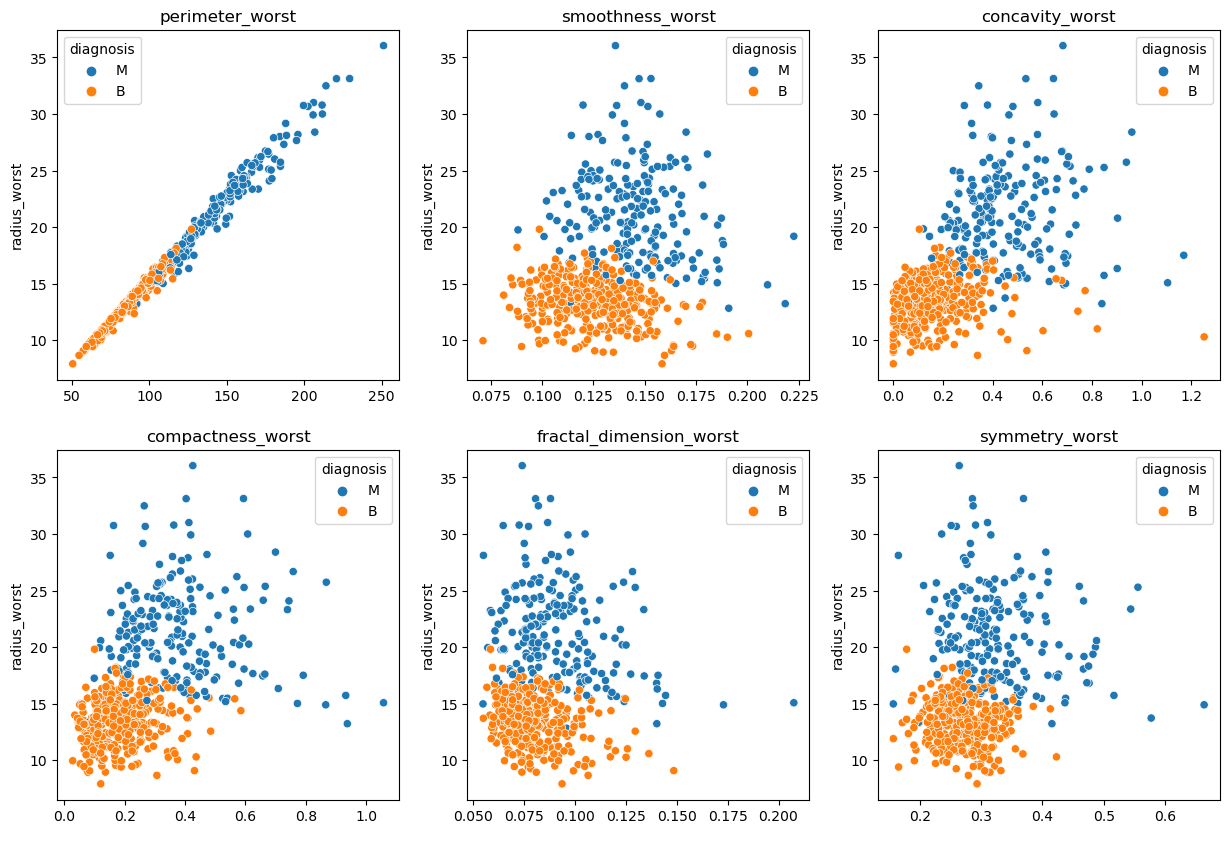

In [12]:
cols=['perimeter_worst','smoothness_worst','concavity_worst','compactness_worst','fractal_dimension_worst','symmetry_worst']
plt.figure(figsize=(15,10))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=df[col],y=df['radius_worst'],hue=df['diagnosis'])
    plt.title(col)
    plt.xlabel(" ")
plt.show()

## Encoding

In [13]:
df['diagnosis']=df['diagnosis'].apply(lambda x:1 if x=='M' else 0 )

<Axes: >

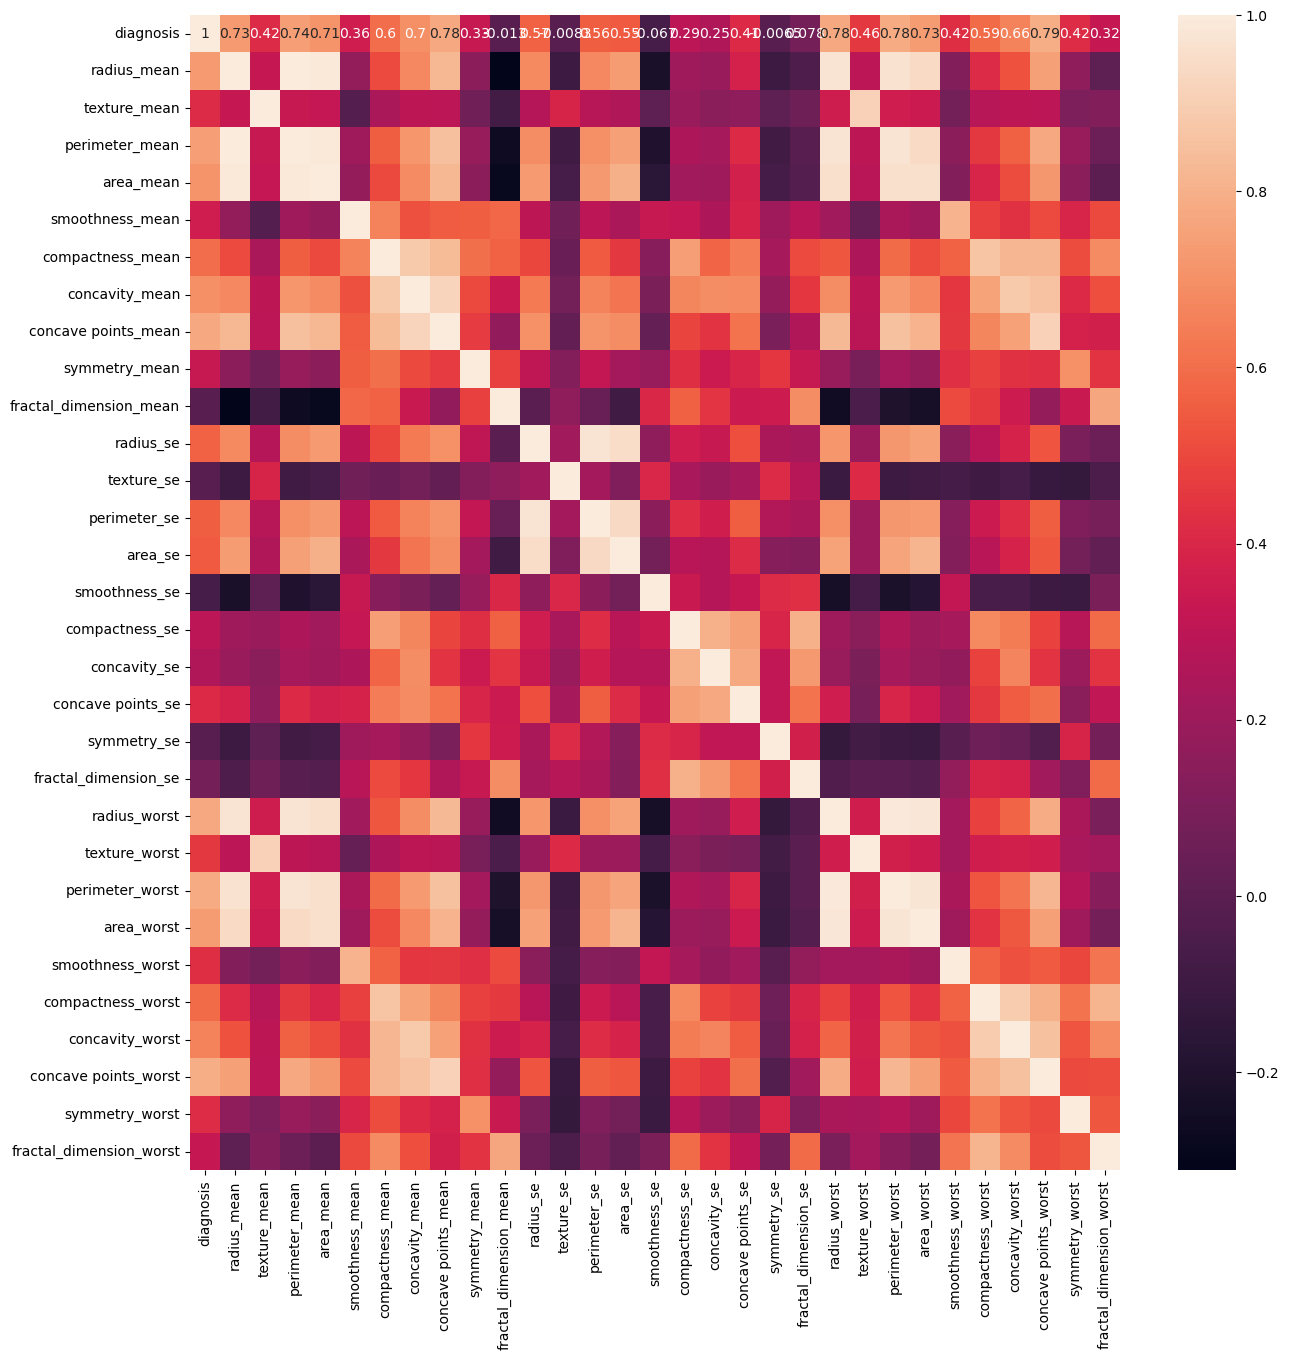

In [14]:
corrleation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrleation,annot=True)

In [15]:
corrleation

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

## Splitting

In [16]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

## Standardization

In [18]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## LogisticRegression

In [19]:
lo=LogisticRegression()
lo.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred_lo=lo.predict(X_test)

In [21]:
print(confusion_matrix(y_test,y_pred_lo))
print(accuracy_score(y_test,y_pred_lo))

[[70  1]
 [ 2 41]]
0.9736842105263158


## kNN

In [22]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [23]:
print(confusion_matrix(y_test,Y_pred_knn))
print(accuracy_score(y_test,Y_pred_knn))

[[68  3]
 [ 3 40]]
0.9473684210526315


## SVM

In [24]:
svm_clf = SVC(kernel='linear', C=0.1, probability=True)
svm_clf.fit(X_train, y_train)
Y_pred_svm=svm_clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test,Y_pred_svm))
print(accuracy_score(y_test,Y_pred_svm))

[[71  0]
 [ 2 41]]
0.9824561403508771


## Xgboost

In [26]:
xg = XGBClassifier(objective='binary:logistic')
xg.fit(X_train,y_train)
Y_pred_xg=xg.predict(X_test)

In [27]:
print(confusion_matrix(y_test,Y_pred_xg))
print(accuracy_score(y_test,Y_pred_xg))

[[69  2]
 [ 3 40]]
0.956140350877193


## RandomForest

In [28]:
RF=RandomForestClassifier(n_estimators=50,max_depth=5,max_leaf_nodes=20)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=20, n_estimators=50)

In [29]:
RF_y_pred=lo.predict(X_test)

In [30]:
print(confusion_matrix(y_test,RF_y_pred))
print(accuracy_score(y_test,RF_y_pred))

[[70  1]
 [ 2 41]]
0.9736842105263158


## Voting

In [31]:
Voting_clf=VotingClassifier(estimators=[
    ('logit',lo),
    ('knn',knn),
    ('svc',svm_clf),
    ('RF',RF),
    ('xgboost',xg)
    
    
],voting='hard')
Voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('logit', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('svc',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('RF',
                              RandomForestClassifier(max_depth=5,
                                                     max_leaf_nodes=20,
                                                     n_estimators=50)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [32]:
Y_pred_Voting_clf=Voting_clf.predict(X_test)

In [33]:
print(confusion_matrix(y_test,Y_pred_Voting_clf))
print(accuracy_score(y_test,Y_pred_Voting_clf))

[[70  1]
 [ 2 41]]
0.9736842105263158


## ANN

In [34]:
model = Sequential([
    Dense(32, activation='relu', input_dim=30),
    
    Dense(16, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1760 - loss: 0.8984 - val_accuracy: 0.3516 - val_loss: 0.7343
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4754 - loss: 0.6844 - val_accuracy: 0.7253 - val_loss: 0.5797
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8190 - loss: 0.5578 - val_accuracy: 0.9011 - val_loss: 0.4651
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9199 - loss: 0.4405 - val_accuracy: 0.9560 - val_loss: 0.3542
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.3517 - val_accuracy: 0.9560 - val_loss: 0.2708
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9214 - loss: 0.2722 - val_accuracy: 0.9560 - val_loss: 0.2191
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9484 - loss: 0.2083 - val_accuracy: 0.9560 - val_loss: 0.1866
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9691 - loss: 0.1648 - val_accuracy: 0.9560 - val_loss

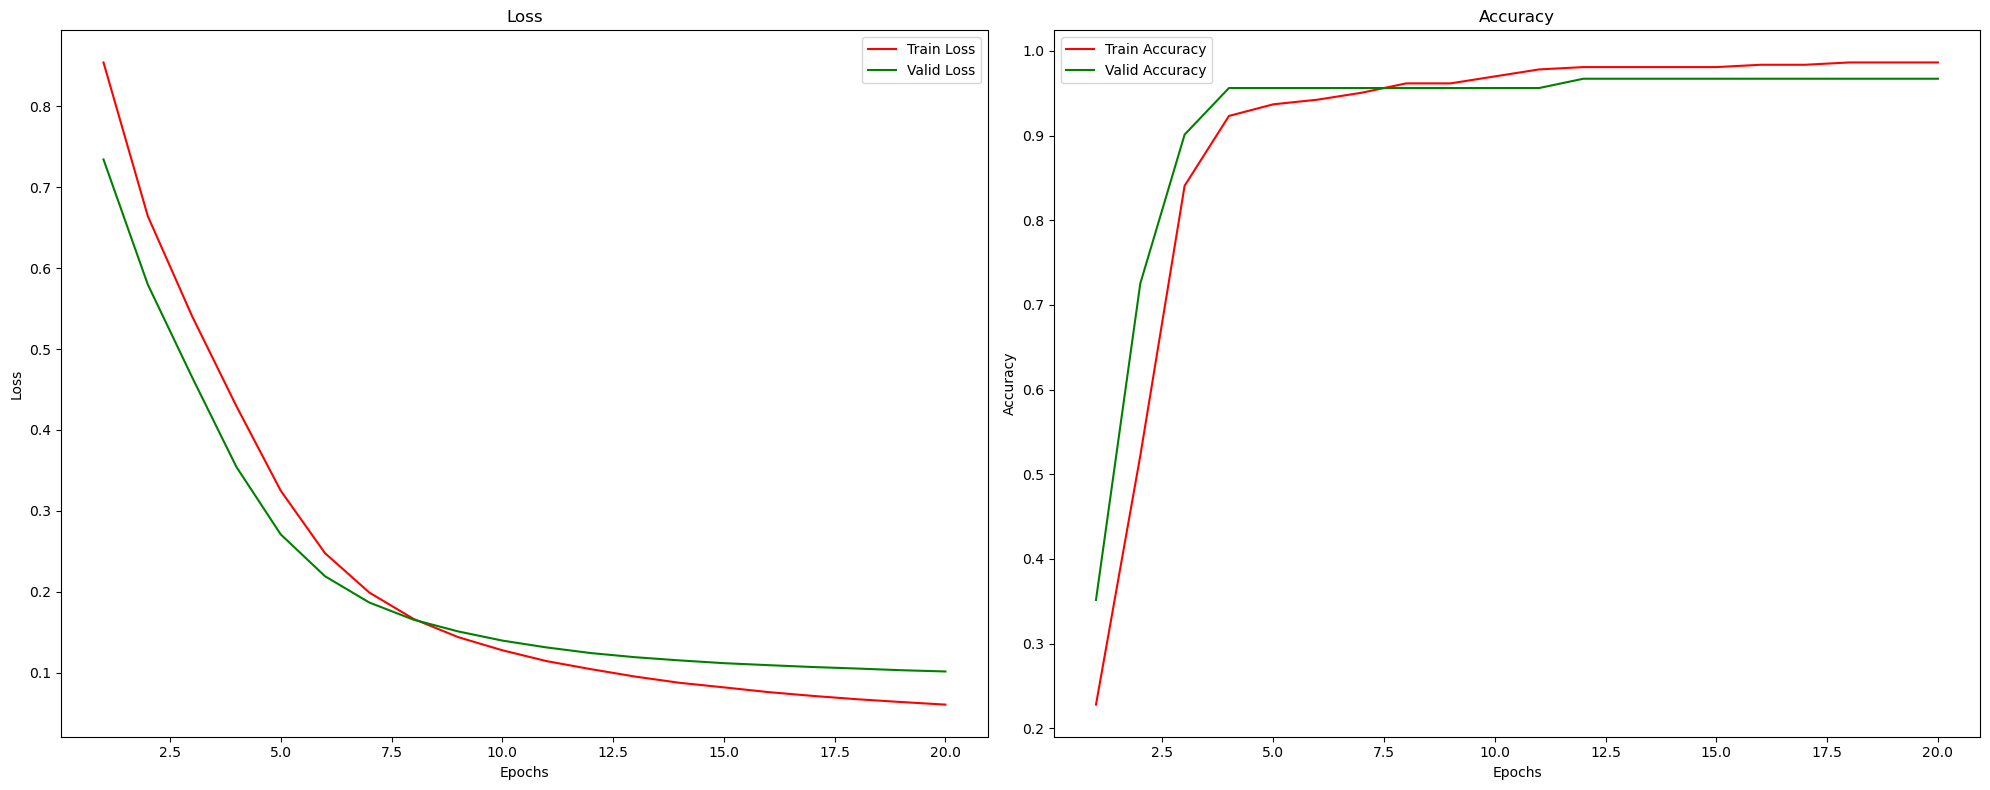

In [36]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[69,  2],
       [ 1, 42]], dtype=int64)

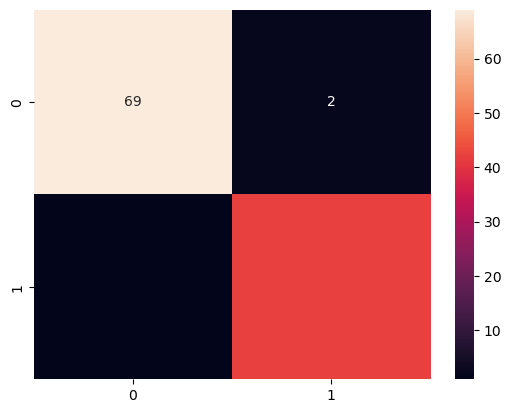

In [39]:
sns.heatmap(cm, annot=True)
plt.show()

In [40]:
print("\nclassification_report\n")
cr=classification_report(y_test, y_pred,target_names=["benign","malignant"])
print(cr)


classification_report

              precision    recall  f1-score   support

      benign       0.99      0.97      0.98        71
   malignant       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

